In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python# For example, here's several helpful packages to loadimport numpy as np # linear algebraimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)# Input data files are available in the read-only "../input/" directory# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport osfor dirname, _, filenames in os.walk('/kaggle/input'):    for filename in filenames:        print(os.path.join(dirname, filename))# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install openpyxl # Install the openpyxl library using pip

In [2]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
df = pd.read_excel('/content/glassdoor_reviews_COPY_FULL.xlsx')
# Now you can work with the dataframe 'df'
# Example: print the first 5 rows
df.head()

,Review ID,Company Name,Overall Rating,Header,Job Title,Employment Status,Employment Tenure,Location,Recommend,CEO Approval,Business Outlook,Pros,Cons,Review Date
0,1,Deloitte,3,Good learning,Senior manager,Current employee,more than 10 years,Mumbai,Yes,Yes,Yes,Lot of learning and to work on latest technolo...,Work life fit and bureaucracy,"Oct 28, 2024"
1,2,Deloitte,3,Work environment,Senior tax manager,Current employee,more than 10 years,Portugal,No,No Data,No,Acess to information and a lot of learning cou...,Environment very competitive between colleague...,"Oct 28, 2024"
2,3,Deloitte,4,Good work culture,Analyst,Current employee,less than 1 year,Hyderābād,Yes,Yes,Yes,Flexi and nice people communication,Less salary and also growth is slow,"Oct 28, 2024"
3,4,Deloitte,4,Good place,Senior developer,Current employee,NaN,Bengaluru,No Data,No Data,No Data,Good working culture in the office,Less salary and less increments,"Oct 28, 2024"
4,5,Deloitte,3,Life at deloitte,Tax consultant,Former employee,NaN,Pune,No Data,No Data,No Data,"Great working environment, Good mentoring",Too many working hours and no extra payment,"Oct 28, 2024"


In [3]:
# prompt: Remove stop words from Pros column and Cons column and change it all to lower case

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):  # Check if the input is a string
        words = text.lower().split()
        filtered_words = [word for word in words if word not in stop_words]
        return " ".join(filtered_words)
    else:
        return text  # Return the original value if it's not a string

df['Pros'] = df['Pros'].apply(remove_stopwords)
df['Cons'] = df['Cons'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# prompt: check for null values

import pandas as pd
import nltk
from nltk.corpus import stopwords


# Check for null values in the entire DataFrame
print(df.isnull().sum())



Review ID                0
Company Name             0
Overall Rating           0
Header                 982
Job Title                0
Employment Status        0
Employment Tenure    41793
Location             19299
Recommend                0
CEO Approval             0
Business Outlook         0
Pros                     0
Cons                     0
Review Date              0
dtype: int64


In [5]:
# prompt: Remove special characters from Pros and Cons column. Also remove the word "page" from it

import re

def remove_special_characters(text):
    if isinstance(text, str):
        # Remove special characters and the word "page"
        text = re.sub(r'[^\w\s]', '', text)
        text = text.replace("page", "")
        return text
    else:
        return text

df['Pros'] = df['Pros'].apply(remove_special_characters)
df['Cons'] = df['Cons'].apply(remove_special_characters)
df.head()

,Review ID,Company Name,Overall Rating,Header,Job Title,Employment Status,Employment Tenure,Location,Recommend,CEO Approval,Business Outlook,Pros,Cons,Review Date
0,1,Deloitte,3,Good learning,Senior manager,Current employee,more than 10 years,Mumbai,Yes,Yes,Yes,lot learning work latest technologies,work life fit bureaucracy,"Oct 28, 2024"
1,2,Deloitte,3,Work environment,Senior tax manager,Current employee,more than 10 years,Portugal,No,No Data,No,acess information lot learning courses,environment competitive colleagues,"Oct 28, 2024"
2,3,Deloitte,4,Good work culture,Analyst,Current employee,less than 1 year,Hyderābād,Yes,Yes,Yes,flexi nice people communication,less salary also growth slow,"Oct 28, 2024"
3,4,Deloitte,4,Good place,Senior developer,Current employee,NaN,Bengaluru,No Data,No Data,No Data,good working culture office,less salary less increments,"Oct 28, 2024"
4,5,Deloitte,3,Life at deloitte,Tax consultant,Former employee,NaN,Pune,No Data,No Data,No Data,great working environment good mentoring,many working hours extra payment,"Oct 28, 2024"


In [10]:
# prompt: lemmatize words in Pros and Cons columns so that they convert to base
!pip install nltk
import nltk

# Download the required data package
nltk.download('punkt_tab')

# ... (your existing code) ...

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def lemmatize_text(text):
    """Lemmatizes words in a given text."""
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)  # Tokenize the text into words
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmas)  # Join the lemmas back into a string

# Create the 'wordsdf' DataFrame by copying 'df'
wordsdf = df.copy()  # Now 'wordsdf' is defined

wordsdf['Pros'] = df['Pros'].astype(str).apply(lemmatize_text)
wordsdf['Cons'] = df['Cons'].astype(str).apply(lemmatize_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# prompt: create a new column "employment status_encoded" which has Employment status values 0 for Former employee and 1 for Current employee

# Create the new column 'employment status_encoded'
df['employment status_encoded'] = df['Employment Status'].map({'Former employee': 0, 'Current employee': 1})

In [12]:
# prompt: create a new column "Review" that joins the Pros and Cons columns

# Assuming 'df' is your DataFrame as defined in the previous code
df['Review'] = df['Pros'].astype(str) + ' ' + df['Cons'].astype(str)
df.head()

,Review ID,Company Name,Overall Rating,Header,Job Title,Employment Status,Employment Tenure,Location,Recommend,CEO Approval,Business Outlook,Pros,Cons,Review Date,employment status_encoded,Review
0,1,Deloitte,3,Good learning,Senior manager,Current employee,more than 10 years,Mumbai,Yes,Yes,Yes,lot learning work latest technologies,work life fit bureaucracy,"Oct 28, 2024",1,lot learning work latest technologies work lif...
1,2,Deloitte,3,Work environment,Senior tax manager,Current employee,more than 10 years,Portugal,No,No Data,No,acess information lot learning courses,environment competitive colleagues,"Oct 28, 2024",1,acess information lot learning courses environ...
2,3,Deloitte,4,Good work culture,Analyst,Current employee,less than 1 year,Hyderābād,Yes,Yes,Yes,flexi nice people communication,less salary also growth slow,"Oct 28, 2024",1,flexi nice people communication less salary al...
3,4,Deloitte,4,Good place,Senior developer,Current employee,NaN,Bengaluru,No Data,No Data,No Data,good working culture office,less salary less increments,"Oct 28, 2024",1,good working culture office less salary less i...
4,5,Deloitte,3,Life at deloitte,Tax consultant,Former employee,NaN,Pune,No Data,No Data,No Data,great working environment good mentoring,many working hours extra payment,"Oct 28, 2024",0,great working environment good mentoring many ...


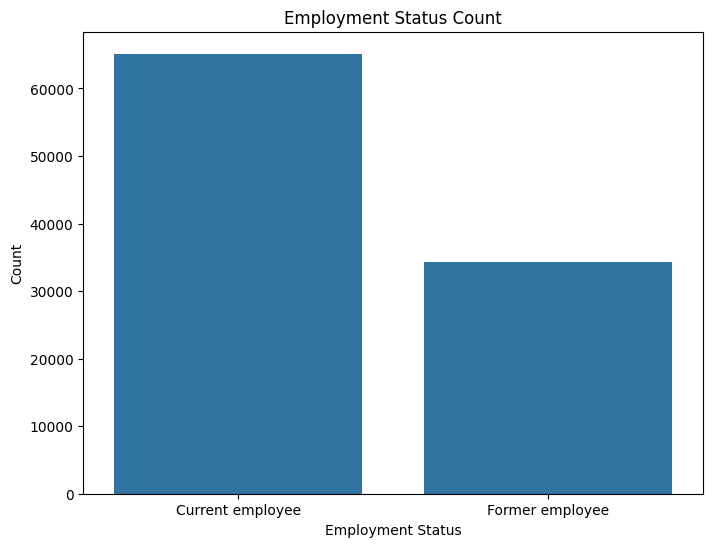

In [10]:
# prompt: Make a graph of Employment Status count

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code

# Count the occurrences of each employment status
employment_status_counts = df['Employment Status'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Employment Status', data=df)
plt.title('Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

In [10]:
# prompt: check for null values in Reviews

# Check for null values in the 'Reviews' column
null_reviews = df['Review'].isnull().sum()
print(f"Number of null values in 'Review' column: {null_reviews}")

# If you want to see the rows with null values:
#rows_with_null_reviews = df[df['Review'].isnull()]
#print(rows_with_null_reviews)

Number of null values in 'Review' column: 0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import accuracy_score

import numpy as np

# Sample data
texts = df['Review']
additional_feature = df['Overall Rating']  # Example numeric feature
labels = df['employment status_encoded']

# Combine features into a DataFrame
X = pd.DataFrame({
    'Review': texts,
    'Overall Rating': additional_feature
})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights_dict = dict(enumerate(class_weights))
print(f"Class Weights: {weights_dict}")

# Define the transformers
text_transformer = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=10000, max_df=0.95, min_df=0.05, ngram_range=(1, 2))),
    ('lda', LatentDirichletAllocation(n_components=5, random_state=42, learning_method='online', max_iter=20, learning_decay=0.5, n_jobs=-1))
])

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
# Update: Apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'Review'),
        ('num', numeric_transformer, ['Overall Rating']),
    ])

# Define pipeline with optimizations
# Update: Include preprocessor in the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight=weights_dict))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f" RandomForestClassifier Accuracy: {score}")

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.42      0.47      0.45      6952
           1       0.70      0.66      0.68     12934

    accuracy                           0.59     19886
   macro avg       0.56      0.56      0.56     19886
weighted avg       0.60      0.59      0.60     19886



In [7]:
##BERTopic
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [25]:
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
from sentence_transformers import SentenceTransformer # Import SentenceTransformer

# Sample data
texts = df['Review'][:5000]
labels = df['employment status_encoded'][:5000]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2') # Initialize a SentenceTransformer model

# Generate embeddings for training and testing data
X_train_embeddings = sentence_model.encode(X_train.tolist()) # Generate embeddings for training data
X_test_embeddings = sentence_model.encode(X_test.tolist()) # Generate embeddings for testing data


# Define pipeline with BERTopic and RandomForestClassifier
# Update: Use FunctionTransformer to apply sentence_model.encode to text data
pipeline = Pipeline([
    ('topic_modeling', BERTopic(embedding_model=sentence_model, nr_topics=15, verbose=True)),  # Pass sentence_model to BERTopic
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

# Fit the model using embeddings of the training data
pipeline.fit(X_train_embeddings, y_train) # Pass embeddings to the fit method

# Predict and evaluate using embeddings of the test data
y_pred = pipeline.predict(X_test_embeddings) # Pass embeddings to the predict method
score = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Accuracy with BERTopic: {score}")

TypeError: Make sure that the iterable only contains strings.

In [29]:
#Bertopic 2
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
import pandas as pd

# Sample data
texts = df['Review'][:5000]
labels = df['employment status_encoded'][:5000]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=15, verbose=True)

# Fit BERTopic on the raw text data
topics_train, _ = topic_model.fit_transform(X_train)  # Pass raw text, not embeddings
topics_test, _ = topic_model.transform(X_test)  # Pass raw text for the test data

# Now `topics_train` and `topics_test` are topic distributions

# Train a RandomForestClassifier using topic distributions as features
classifier = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
classifier.fit(topics_train, y_train)  # Train classifier on topic distributions

# Predict and evaluate
y_pred = classifier.predict(topics_test)  # Make predictions using topic distributions
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic: {score}")

2024-11-17 13:47:57,103 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

2024-11-17 13:53:08,010 - BERTopic - Embedding - Completed ✓
2024-11-17 13:53:08,014 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-17 13:53:43,581 - BERTopic - Dimensionality - Completed ✓
2024-11-17 13:53:43,584 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-17 13:53:43,806 - BERTopic - Cluster - Completed ✓
2024-11-17 13:53:43,808 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-17 13:53:43,882 - BERTopic - Representation - Completed ✓
2024-11-17 13:53:43,884 - BERTopic - Topic reduction - Reducing number of topics
2024-11-17 13:53:43,889 - BERTopic - Topic reduction - Reduced number of topics from 2 to 2


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-17 13:55:09,280 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 13:55:27,388 - BERTopic - Dimensionality - Completed ✓
2024-11-17 13:55:27,390 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 13:55:27,481 - BERTopic - Cluster - Completed ✓


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
#Bertopic3
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
import pandas as pd

# Sample data
texts = df['Review'][:5000]
labels = df['employment status_encoded'][:5000]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=15, verbose=True)

# Fit BERTopic on the raw text data
topics_train, _ = topic_model.fit_transform(X_train)  # Pass raw text, not embeddings
topics_test, _ = topic_model.transform(X_test)  # Pass raw text for the test data

# Now `topics_train` and `topics_test` are topic distributions

# Ensure topics_train is 2D (it should be a 2D matrix of shape [n_samples, n_topics])
topics_train = topics_train.reshape(-1, 1) if len(topics_train.shape) == 1 else topics_train
topics_test = topics_test.reshape(-1, 1) if len(topics_test.shape) == 1 else topics_test

# Flatten y_train and y_test if necessary (to ensure they are 1D arrays)
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Train a RandomForestClassifier using topic distributions as features
classifier = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
classifier.fit(topics_train, y_train)  # Train classifier on topic distributions

# Predict and evaluate
y_pred = classifier.predict(topics_test)  # Make predictions using topic distributions
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic: {score}")




2024-11-17 13:59:36,687 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

2024-11-17 14:04:46,533 - BERTopic - Embedding - Completed ✓
2024-11-17 14:04:46,535 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-17 14:05:21,769 - BERTopic - Dimensionality - Completed ✓
2024-11-17 14:05:21,772 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-17 14:05:22,183 - BERTopic - Cluster - Completed ✓
2024-11-17 14:05:22,186 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-17 14:05:22,361 - BERTopic - Representation - Completed ✓
2024-11-17 14:05:22,364 - BERTopic - Topic reduction - Reducing number of topics
2024-11-17 14:05:22,369 - BERTopic - Topic reduction - Reduced number of topics from 2 to 2


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-17 14:06:49,134 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 14:07:02,937 - BERTopic - Dimensionality - Completed ✓
2024-11-17 14:07:02,939 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 14:07:03,014 - BERTopic - Cluster - Completed ✓


AttributeError: 'list' object has no attribute 'shape'

In [37]:
#Bertopic4
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Sample data
texts = df['Review'][:5000]
labels = df['employment status_encoded'][:5000]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=15, verbose=True)

# Fit BERTopic on the raw text data
topics_train, _ = topic_model.fit_transform(X_train)  # Pass raw text, not embeddings
topics_test, _ = topic_model.transform(X_test)  # Pass raw text for the test data

# Convert topics_train and topics_test from lists to NumPy arrays
topics_train = np.array(topics_train)
topics_test = np.array(topics_test)

# Ensure topics_train and topics_test are 2D
topics_train = topics_train.reshape(-1, 1) if topics_train.ndim == 1 else topics_train
topics_test = topics_test.reshape(-1, 1) if topics_test.ndim == 1 else topics_test

# Flatten y_train and y_test if necessary (to ensure they are 1D arrays)
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Train a RandomForestClassifier using topic distributions as features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, class_weight='balanced')
classifier.fit(topics_train, y_train)  # Train classifier on topic distributions

# Predict and evaluate
y_pred = classifier.predict(topics_test)  # Make predictions using topic distributions
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic: {score}")


2024-11-17 14:33:19,876 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

2024-11-17 14:38:28,072 - BERTopic - Embedding - Completed ✓
2024-11-17 14:38:28,076 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-17 14:39:02,240 - BERTopic - Dimensionality - Completed ✓
2024-11-17 14:39:02,242 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-17 14:39:02,458 - BERTopic - Cluster - Completed ✓
2024-11-17 14:39:02,459 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-17 14:39:02,539 - BERTopic - Representation - Completed ✓
2024-11-17 14:39:02,541 - BERTopic - Topic reduction - Reducing number of topics
2024-11-17 14:39:02,545 - BERTopic - Topic reduction - Reduced number of topics from 2 to 2


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-17 14:40:28,583 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 14:40:42,469 - BERTopic - Dimensionality - Completed ✓
2024-11-17 14:40:42,471 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 14:40:42,544 - BERTopic - Cluster - Completed ✓


RandomForestClassifier Accuracy with BERTopic: 0.37


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.35      0.97      0.52       352
           1       0.71      0.05      0.09       648

    accuracy                           0.37      1000
   macro avg       0.53      0.51      0.30      1000
weighted avg       0.59      0.37      0.24      1000



In [51]:
#Bertopic: adding overall rating as a X variable:
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Sample data
texts = df['Review'][:20000]
labels = df['employment status_encoded'][:20000]
overall_rating = df['Overall Rating'][:20000]  # Include 'Overall Rating'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=30, verbose=True)

# Fit BERTopic on the raw text data
topics_train, _ = topic_model.fit_transform(X_train)  # Pass raw text, not embeddings
topics_test, _ = topic_model.transform(X_test)  # Pass raw text for the test data

# Convert topics_train and topics_test from lists to NumPy arrays
topics_train = np.array(topics_train)
topics_test = np.array(topics_test)

# Ensure topics_train and topics_test are 2D
topics_train = topics_train.reshape(-1, 1) if topics_train.ndim == 1 else topics_train
topics_test = topics_test.reshape(-1, 1) if topics_test.ndim == 1 else topics_test

# Flatten y_train and y_test if necessary (to ensure they are 1D arrays)
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Add the 'Overall Rating' as an additional feature
X_train_combined = np.hstack([topics_train, np.array(overall_rating[:len(topics_train)]).reshape(-1, 1)])  # Combine topic distributions and overall rating
X_test_combined = np.hstack([topics_test, np.array(overall_rating[len(topics_train):]).reshape(-1, 1)])  # Combine topic distributions and overall rating


# Train a RandomForestClassifier using the combined features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42,class_weight='balanced')
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic and Overall Rating: {score}")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


2024-11-17 16:01:11,147 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/500 [00:00<?, ?it/s]

2024-11-17 16:20:48,151 - BERTopic - Embedding - Completed ✓
2024-11-17 16:20:48,154 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-17 16:21:05,574 - BERTopic - Dimensionality - Completed ✓
2024-11-17 16:21:05,576 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-17 16:21:06,746 - BERTopic - Cluster - Completed ✓
2024-11-17 16:21:06,748 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-17 16:21:07,184 - BERTopic - Representation - Completed ✓
2024-11-17 16:21:07,185 - BERTopic - Topic reduction - Reducing number of topics
2024-11-17 16:21:07,559 - BERTopic - Topic reduction - Reduced number of topics from 154 to 30


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

2024-11-17 16:26:29,839 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 16:26:36,604 - BERTopic - Dimensionality - Completed ✓
2024-11-17 16:26:36,606 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 16:26:37,118 - BERTopic - Cluster - Completed ✓


NameError: name 'MinMaxScaler' is not defined

In [69]:
#BERTopic with scaling
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Sample data
X = pd.DataFrame({'Review': df['Review'][:30000], 'Overall Rating': df['Overall Rating'][:30000]})  # Combine texts and overall_rating
y = df['employment status_encoded'][:30000]

# Train-test split, including overall rating as part of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=50, verbose=True)

# Fit BERTopic on the raw text data (only the Review column, which is the text data)
topics_train_proba = topic_model.fit_transform(X_train['Review'])[1]  # Get topic probabilities for training
topics_test_proba = topic_model.transform(X_test['Review'])[1]  # Get topic probabilities for testing

# Convert probabilities to NumPy arrays
topics_train_proba = np.array(topics_train_proba)
topics_test_proba = np.array(topics_test_proba)

# Reshape topics_train_proba and topics_test_proba to ensure they are 2D arrays (if needed)
if topics_train_proba.ndim == 1:
    topics_train_proba = topics_train_proba.reshape(-1, 1)
if topics_test_proba.ndim == 1:
    topics_test_proba = topics_test_proba.reshape(-1, 1)

# Combine Overall Rating with topic probabilities
overall_rating_train = np.array(X_train['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array
overall_rating_test = np.array(X_test['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array

# Scale topic probabilities and Overall Rating
scaler = MinMaxScaler()  # Scale features between 0 and 1

# Rescale and combine the topic probabilities and overall rating
X_train_combined = np.hstack([scaler.fit_transform(topics_train_proba), scaler.fit_transform(overall_rating_train)])
X_test_combined = np.hstack([scaler.transform(topics_test_proba), scaler.transform(overall_rating_test)])

# Train a RandomForestClassifier using the combined features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, class_weight='balanced')
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))


2024-11-17 17:17:38,483 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/750 [00:00<?, ?it/s]

2024-11-17 17:46:29,634 - BERTopic - Embedding - Completed ✓
2024-11-17 17:46:29,637 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-17 17:46:56,531 - BERTopic - Dimensionality - Completed ✓
2024-11-17 17:46:56,533 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-17 17:47:03,873 - BERTopic - Cluster - Completed ✓
2024-11-17 17:47:03,877 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-17 17:47:04,945 - BERTopic - Representation - Completed ✓
2024-11-17 17:47:04,948 - BERTopic - Topic reduction - Reducing number of topics
2024-11-17 17:47:05,791 - BERTopic - Topic reduction - Reduced number of topics from 182 to 50


Batches:   0%|          | 0/188 [00:00<?, ?it/s]

2024-11-17 17:54:38,301 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 17:54:49,249 - BERTopic - Dimensionality - Completed ✓
2024-11-17 17:54:49,251 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 17:54:50,092 - BERTopic - Cluster - Completed ✓


RandomForestClassifier Accuracy with BERTopic and Overall Rating (scaled): 0.6203333333333333
              precision    recall  f1-score   support

           0       0.42      0.38      0.40      1984
           1       0.71      0.74      0.72      4016

    accuracy                           0.62      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.61      0.62      0.61      6000



In [57]:
'''#BERTopic with scaling
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Sample data
X = pd.DataFrame({'Review': texts, 'Overall Rating': overall_rating})[:1000]  # Combine texts and overall_rating
y = labels[:1000]

# Train-test split, including overall rating as part of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=30, verbose=True)

# Fit BERTopic on the raw text data
topics_train_proba = topic_model.fit_transform(X_train)[1]  # Get topic probabilities for training
topics_test_proba = topic_model.transform(X_test)[1]  # Get topic probabilities for testing

# Convert probabilities to NumPy arrays
topics_train_proba = np.array(topics_train_proba)
topics_test_proba = np.array(topics_test_proba)

# Reshape topics_train_proba and topics_test_proba to ensure they are 2D arrays (if needed)
if topics_train_proba.ndim == 1:
    topics_train_proba = topics_train_proba.reshape(-1, 1)
if topics_test_proba.ndim == 1:
    topics_test_proba = topics_test_proba.reshape(-1, 1)

# Combine Overall Rating with topic probabilities
overall_rating_train = np.array(overall_rating[:len(topics_train_proba)]).reshape(-1, 1)  # Reshape to 2D array
overall_rating_test = np.array(overall_rating[len(topics_train_proba):]).reshape(-1, 1)  # Reshape to 2D array

# Scale topic probabilities and Overall Rating
scaler = MinMaxScaler()  # Scale features between 0 and 1

# Rescale and combine the topic probabilities and overall rating
X_train_combined = np.hstack([scaler.fit_transform(topics_train_proba), scaler.fit_transform(overall_rating_train)])
X_test_combined = np.hstack([scaler.transform(topics_test_proba), scaler.transform(overall_rating_test)])

# Train a RandomForestClassifier using the combined features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, class_weight='balanced')
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))

TypeError: Make sure to supply a list of strings, not a dataframe.

In [70]:
# Train a LogisticRegression using the combined features
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')  # Use Logistic Regression
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"LogisticRegression Accuracy with BERTopic and Overall Rating: {score}")
print(classification_report(y_test, y_pred))  # Display detailed classification report

LogisticRegression Accuracy with BERTopic and Overall Rating: 0.5253333333333333
              precision    recall  f1-score   support

           0       0.38      0.66      0.48      1984
           1       0.73      0.46      0.56      4016

    accuracy                           0.53      6000
   macro avg       0.55      0.56      0.52      6000
weighted avg       0.61      0.53      0.54      6000



In [71]:
#Using SVM
from sklearn.svm import SVC # Import SVC

# Train an SVM classifier with balanced class weights
classifier = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)  # Linear kernel
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"SVM Accuracy with BERTopic and Overall Rating (Balanced Weights): {score}")
print(classification_report(y_test, y_pred))  # Display detailed classification report

SVM Accuracy with BERTopic and Overall Rating (Balanced Weights): 0.6203333333333333
              precision    recall  f1-score   support

           0       0.42      0.38      0.40      1984
           1       0.71      0.74      0.72      4016

    accuracy                           0.62      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.61      0.62      0.61      6000



In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.56      0.43       352
           1       0.64      0.43      0.51       648

    accuracy                           0.47      1000
   macro avg       0.50      0.49      0.47      1000
weighted avg       0.54      0.47      0.48      1000



In [ ]:
#Bertopic with cross validation and Gridsearch
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Sample data
X = pd.DataFrame({'Review': df['Review'][:20000], 'Overall Rating': df['Overall Rating'][:20000]})  # Combine texts and overall_rating
y = df['employment status_encoded'][:20000]

# Train-test split, including overall rating as part of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=50, verbose=True)

# Fit BERTopic on the raw text data (only the Review column, which is the text data)
topics_train_proba = topic_model.fit_transform(X_train['Review'])[1]  # Get topic probabilities for training
topics_test_proba = topic_model.transform(X_test['Review'])[1]  # Get topic probabilities for testing

# Convert probabilities to NumPy arrays
topics_train_proba = np.array(topics_train_proba)
topics_test_proba = np.array(topics_test_proba)

# Reshape topics_train_proba and topics_test_proba to ensure they are 2D arrays (if needed)
if topics_train_proba.ndim == 1:
    topics_train_proba = topics_train_proba.reshape(-1, 1)
if topics_test_proba.ndim == 1:
    topics_test_proba = topics_test_proba.reshape(-1, 1)

# Combine Overall Rating with topic probabilities
overall_rating_train = np.array(X_train['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array
overall_rating_test = np.array(X_test['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array

# Scale topic probabilities and Overall Rating
scaler = MinMaxScaler()  # Scale features between 0 and 1

# Rescale and combine the topic probabilities and overall rating
X_train_combined = np.hstack([scaler.fit_transform(topics_train_proba), scaler.fit_transform(overall_rating_train)])
X_test_combined = np.hstack([scaler.transform(topics_test_proba), scaler.transform(overall_rating_test)])



2024-11-17 18:05:57,898 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/500 [00:00<?, ?it/s]

2024-11-17 18:25:34,236 - BERTopic - Embedding - Completed ✓
2024-11-17 18:25:34,238 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-17 18:25:51,596 - BERTopic - Dimensionality - Completed ✓
2024-11-17 18:25:51,600 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-17 18:25:53,017 - BERTopic - Cluster - Completed ✓
2024-11-17 18:25:53,019 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-17 18:25:53,762 - BERTopic - Representation - Completed ✓
2024-11-17 18:25:53,765 - BERTopic - Topic reduction - Reducing number of topics
2024-11-17 18:25:54,366 - BERTopic - Topic reduction - Reduced number of topics from 166 to 50


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

2024-11-17 18:31:16,163 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 18:31:22,297 - BERTopic - Dimensionality - Completed ✓
2024-11-17 18:31:22,299 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 18:31:22,763 - BERTopic - Cluster - Completed ✓


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all CPU cores
                           verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_combined, y_train)

# Get the best hyperparameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Train and evaluate with the best estimator from GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Predict and evaluate using the best model
y_pred = best_rf_classifier.predict(X_test_combined)
score = accuracy_score(y_test, y_pred)
print(f"Optimized RandomForestClassifier Accuracy with BERTopic and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))


In [17]:
##Bertopic with SMOTE


from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from bertopic import BERTopic

# Sample data
X = pd.DataFrame({'Review': df['Review'], 'Overall Rating': df['Overall Rating']})  # Combine texts and overall_rating
y = df['employment status_encoded']

# Train-test split, including overall rating as part of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=50, verbose=True)

# Fit BERTopic on the raw text data (only the Review column, which is the text data)
topics_train_proba = topic_model.fit_transform(X_train['Review'])[1]  # Get topic probabilities for training
topics_test_proba = topic_model.transform(X_test['Review'])[1]  # Get topic probabilities for testing

# Convert probabilities to NumPy arrays
topics_train_proba = np.array(topics_train_proba)
topics_test_proba = np.array(topics_test_proba)

# Reshape topics_train_proba and topics_test_proba to ensure they are 2D arrays (if needed)
if topics_train_proba.ndim == 1:
    topics_train_proba = topics_train_proba.reshape(-1, 1)
if topics_test_proba.ndim == 1:
    topics_test_proba = topics_test_proba.reshape(-1, 1)

# Combine Overall Rating with topic probabilities
overall_rating_train = np.array(X_train['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array
overall_rating_test = np.array(X_test['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array

# Scale topic probabilities and Overall Rating
scaler = MinMaxScaler()  # Scale features between 0 and 1

# Rescale and combine the topic probabilities and overall rating
X_train_combined = np.hstack([scaler.fit_transform(topics_train_proba), scaler.fit_transform(overall_rating_train)])
X_test_combined = np.hstack([scaler.transform(topics_test_proba), scaler.transform(overall_rating_test)])

# Apply SMOTE on training data (class balancing)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Train a RandomForestClassifier using the resampled data
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, class_weight='balanced')
classifier.fit(X_train_resampled, y_train_resampled)  # Train classifier on resampled data

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic, SMOTE, and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))

2024-11-17 20:03:49,963 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2486 [00:00<?, ?it/s]

2024-11-17 20:06:20,621 - BERTopic - Embedding - Completed ✓
2024-11-17 20:06:20,624 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-17 20:07:50,228 - BERTopic - Dimensionality - Completed ✓
2024-11-17 20:07:50,234 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-17 20:08:03,884 - BERTopic - Cluster - Completed ✓
2024-11-17 20:08:03,886 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-17 20:08:05,748 - BERTopic - Representation - Completed ✓
2024-11-17 20:08:05,751 - BERTopic - Topic reduction - Reducing number of topics
2024-11-17 20:08:07,136 - BERTopic - Topic reduction - Reduced number of topics from 390 to 50


Batches:   0%|          | 0/622 [00:00<?, ?it/s]

2024-11-17 20:08:45,597 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 20:09:06,837 - BERTopic - Dimensionality - Completed ✓
2024-11-17 20:09:06,838 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 20:09:11,619 - BERTopic - Cluster - Completed ✓


RandomForestClassifier Accuracy with BERTopic, SMOTE, and Overall Rating (scaled): 0.6023332998089108
              precision    recall  f1-score   support

           0       0.43      0.40      0.41      6952
           1       0.69      0.71      0.70     12934

    accuracy                           0.60     19886
   macro avg       0.56      0.56      0.56     19886
weighted avg       0.60      0.60      0.60     19886



In [18]:
#Using SVM
from sklearn.svm import SVC # Import SVC

# Train an SVM classifier with balanced class weights
classifier = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)  # kernel
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"SVM Accuracy with BERTopic and Overall Rating (Balanced Weights): {score}")
print(classification_report(y_test, y_pred))  # Display detailed classification report

SVM Accuracy with BERTopic and Overall Rating (Balanced Weights): 0.6023332998089108
              precision    recall  f1-score   support

           0       0.43      0.40      0.41      6952
           1       0.69      0.71      0.70     12934

    accuracy                           0.60     19886
   macro avg       0.56      0.56      0.56     19886
weighted avg       0.60      0.60      0.60     19886



In [19]:
# Train a LogisticRegression using the combined features
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')  # Use Logistic Regression
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"LogisticRegression Accuracy with BERTopic and Overall Rating: {score}")
print(classification_report(y_test, y_pred))  # Display detailed classification report

LogisticRegression Accuracy with BERTopic and Overall Rating: 0.6023332998089108
              precision    recall  f1-score   support

           0       0.43      0.40      0.41      6952
           1       0.69      0.71      0.70     12934

    accuracy                           0.60     19886
   macro avg       0.56      0.56      0.56     19886
weighted avg       0.60      0.60      0.60     19886



In [21]:
#Using XGBOOST
from xgboost import XGBClassifier
# Train an XGBoost Classifier using the resampled data
classifier = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.1,
    scale_pos_weight=1,  # Adjust for imbalance if needed
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
classifier.fit(X_train_resampled, y_train_resampled)  # Train classifier on resampled data

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"XGBoost Accuracy with BERTopic, SMOTE, and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))

XGBoost Accuracy with BERTopic, SMOTE, and Overall Rating (scaled): 0.6023332998089108
              precision    recall  f1-score   support

           0       0.43      0.40      0.41      6952
           1       0.69      0.71      0.70     12934

    accuracy                           0.60     19886
   macro avg       0.56      0.56      0.56     19886
weighted avg       0.60      0.60      0.60     19886



In [13]:
#BERT with borderline SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Sample data
X = pd.DataFrame({'Review': df['Review'][:2000], 'Overall Rating': df['Overall Rating'][:2000]})  # Combine texts and overall_rating
y = df['employment status_encoded'][:2000]

# Train-test split, including overall rating as part of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Generate embeddings for the 'Review' column
embeddings_train = sentence_model.encode(X_train['Review'].tolist(), show_progress_bar=True)
embeddings_test = sentence_model.encode(X_test['Review'].tolist(), show_progress_bar=True)

# Combine Overall Rating with topic probabilities
overall_rating_train = np.array(X_train['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array
overall_rating_test = np.array(X_test['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array

# Create separate scalers for embeddings and overall rating
scaler_embeddings = MinMaxScaler()  # For embeddings
scaler_ratings = MinMaxScaler()  # For overall ratings

# Scale embeddings and overall rating separately
scaled_embeddings_train = scaler_embeddings.fit_transform(embeddings_train)  # Scale the 768-dimensional embeddings
scaled_embeddings_test = scaler_embeddings.transform(embeddings_test)

scaled_ratings_train = scaler_ratings.fit_transform(overall_rating_train)  # Scale the 1D overall ratings
scaled_ratings_test = scaler_ratings.transform(overall_rating_test)

# Combine scaled embeddings with scaled overall ratings
X_train_combined = np.hstack([scaled_embeddings_train, scaled_ratings_train])
X_test_combined = np.hstack([scaled_embeddings_test, scaled_ratings_test])

# Apply Borderline SMOTE to balance the training data

from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

##smote = SMOTE(sampling_strategy='auto', random_state=42)
##X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Train a RandomForestClassifier using the resampled features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, class_weight='balanced')
classifier.fit(X_train_resampled, y_train_resampled)  # Train classifier on resampled features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERT Embeddings, SMOTE, and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

RandomForestClassifier Accuracy with BERT Embeddings, SMOTE, and Overall Rating (scaled): 0.595
              precision    recall  f1-score   support

           0       0.35      0.20      0.25       138
           1       0.66      0.81      0.72       262

    accuracy                           0.59       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.55      0.59      0.56       400



In [19]:
# Train a LogisticRegression using the combined features
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  # Use Logistic Regression
classifier.fit(X_train_resampled, y_train_resampled)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"LogisticRegression Accuracy with BERTopic and Overall Rating: {score}")
print(classification_report(y_test, y_pred))  # Display detailed classification report

LogisticRegression Accuracy with BERTopic and Overall Rating: 0.5575
              precision    recall  f1-score   support

           0       0.38      0.46      0.42       138
           1       0.68      0.61      0.64       262

    accuracy                           0.56       400
   macro avg       0.53      0.54      0.53       400
weighted avg       0.58      0.56      0.57       400



In [20]:
#Using XGBOOST
from xgboost import XGBClassifier
# Train an XGBoost Classifier using the resampled data
classifier = XGBClassifier(
    n_estimators=1000,
    max_depth=20,
    learning_rate=0.1,
    scale_pos_weight=1,  # Adjust for imbalance if needed
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
classifier.fit(X_train_resampled, y_train_resampled)  # Train classifier on resampled data

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"XGBoost Accuracy with BERTopic, SMOTE, and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with BERTopic, SMOTE, and Overall Rating (scaled): 0.615
              precision    recall  f1-score   support

           0       0.40      0.22      0.29       138
           1       0.67      0.82      0.74       262

    accuracy                           0.61       400
   macro avg       0.53      0.52      0.51       400
weighted avg       0.57      0.61      0.58       400



In [9]:
print(df.columns)

Index(['Review ID', 'Company Name', 'Overall Rating', 'Header', 'Job Title',
       'Employment Status', 'Employment Tenure', 'Location', 'Recommend',
       'CEO Approval', 'Business Outlook', 'Pros', 'Cons', 'Review Date'],
      dtype='object')


In [15]:
##BERT with class weight penalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Sample data
X = pd.DataFrame({'Review': df['Review'][:50000], 'Overall Rating': df['Overall Rating'][:50000]})  # Combine texts and overall_rating
y = df['employment status_encoded'][:50000]

# Train-test split, including overall rating as part of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Generate embeddings for the 'Review' column
embeddings_train = sentence_model.encode(X_train['Review'].tolist(), show_progress_bar=True)
embeddings_test = sentence_model.encode(X_test['Review'].tolist(), show_progress_bar=True)

# Combine Overall Rating with topic probabilities
overall_rating_train = np.array(X_train['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array
overall_rating_test = np.array(X_test['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array

# Create separate scalers for embeddings and overall rating
scaler_embeddings = MinMaxScaler()  # For embeddings
scaler_ratings = MinMaxScaler()  # For overall ratings

# Scale embeddings and overall rating separately
scaled_embeddings_train = scaler_embeddings.fit_transform(embeddings_train)  # Scale the 768-dimensional embeddings
scaled_embeddings_test = scaler_embeddings.transform(embeddings_test)

scaled_ratings_train = scaler_ratings.fit_transform(overall_rating_train)  # Scale the 1D overall ratings
scaled_ratings_test = scaler_ratings.transform(overall_rating_test)

# Combine scaled embeddings with scaled overall ratings
X_train_combined = np.hstack([scaled_embeddings_train, scaled_ratings_train])
X_test_combined = np.hstack([scaled_embeddings_test, scaled_ratings_test])

# Apply Borderline SMOTE to balance the training data

from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

##smote = SMOTE(sampling_strategy='auto', random_state=42)
##X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_resampled
)
class_weights_dict = {0: 1.8, 1: 1.0}  # Assign a higher weight to class 0


# Train Random Forest with class weights
classifier = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    random_state=42,
    class_weight=class_weights_dict
)
classifier.fit(X_train_resampled, y_train_resampled)


# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERT Embeddings, SMOTE, and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))



Batches:   0%|          | 0/1250 [00:00<?, ?it/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

RandomForestClassifier Accuracy with BERT Embeddings, SMOTE, and Overall Rating (scaled): 0.5973
              precision    recall  f1-score   support

           0       0.45      0.67      0.54      3482
           1       0.76      0.56      0.64      6518

    accuracy                           0.60     10000
   macro avg       0.60      0.62      0.59     10000
weighted avg       0.65      0.60      0.61     10000



In [16]:
# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_resampled
)
class_weights_dict = {0: 1.5, 1: 1.0}  # Assign a higher weight to class 0


# Train Random Forest with class weights
classifier = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    random_state=42,
    class_weight=class_weights_dict
)
classifier.fit(X_train_resampled, y_train_resampled)


# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERT Embeddings, SMOTE, and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))



RandomForestClassifier Accuracy with BERT Embeddings, SMOTE, and Overall Rating (scaled): 0.6243
              precision    recall  f1-score   support

           0       0.47      0.61      0.53      3482
           1       0.75      0.63      0.69      6518

    accuracy                           0.62     10000
   macro avg       0.61      0.62      0.61     10000
weighted avg       0.65      0.62      0.63     10000



In [17]:
# Train a LogisticRegression using the combined features
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  # Use Logistic Regression
classifier.fit(X_train_resampled, y_train_resampled)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"LogisticRegression Accuracy with BERTopic and Overall Rating: {score}")
print(classification_report(y_test, y_pred))  # Display detailed classification report

LogisticRegression Accuracy with BERTopic and Overall Rating: 0.5835
              precision    recall  f1-score   support

           0       0.43      0.58      0.49      3482
           1       0.72      0.59      0.65      6518

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.62      0.58      0.59     10000



In [ ]:
##Bertopic without smote with higher number of topics
#BERTopic with scaling
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Sample data
X = pd.DataFrame({'Review': df['Review'][:50000]})  # Combine texts and overall_rating
y = df['employment status_encoded'][:50000]

# Train-test split, including overall rating as part of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=300, verbose=True)

# Fit BERTopic on the raw text data (only the Review column, which is the text data)
topics_train_proba = topic_model.fit_transform(X_train['Review'])[1]  # Get topic probabilities for training
topics_test_proba = topic_model.transform(X_test['Review'])[1]  # Get topic probabilities for testing

# Convert probabilities to NumPy arrays
topics_train_proba = np.array(topics_train_proba)
topics_test_proba = np.array(topics_test_proba)

# Reshape topics_train_proba and topics_test_proba to ensure they are 2D arrays (if needed)
if topics_train_proba.ndim == 1:
    topics_train_proba = topics_train_proba.reshape(-1, 1)
if topics_test_proba.ndim == 1:
    topics_test_proba = topics_test_proba.reshape(-1, 1)

# Combine Overall Rating with topic probabilities
overall_rating_train = np.array(X_train['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array
overall_rating_test = np.array(X_test['Overall Rating']).reshape(-1, 1)  # Reshape to 2D array

# Scale topic probabilities and Overall Rating
scaler = MinMaxScaler()  # Scale features between 0 and 1

# Rescale and combine the topic probabilities and overall rating
X_train_combined = np.hstack([scaler.fit_transform(topics_train_proba), scaler.fit_transform(overall_rating_train)])
X_test_combined = np.hstack([scaler.transform(topics_test_proba), scaler.transform(overall_rating_test)])

# Train a RandomForestClassifier using the combined features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, class_weight='balanced')
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features

# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic and Overall Rating (scaled): {score}")
print(classification_report(y_test, y_pred))


In [34]:
#Bertopic 5
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Sample data
texts = df['Review']
labels = df['employment status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model

# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=30, verbose=True)

# Fit BERTopic on the raw text data
topics_train, _ = topic_model.fit_transform(X_train)  # Pass raw text, not embeddings
topics_test, _ = topic_model.transform(X_test)  # Pass raw text for the test data

# Convert topics_train and topics_test from lists to NumPy arrays
topics_train = np.array(topics_train)
topics_test = np.array(topics_test)

# Ensure topics_train and topics_test are 2D
topics_train = topics_train.reshape(-1, 1) if topics_train.ndim == 1 else topics_train
topics_test = topics_test.reshape(-1, 1) if topics_test.ndim == 1 else topics_test

# Flatten y_train and y_test if necessary (to ensure they are 1D arrays)
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Train a RandomForestClassifier using topic distributions as features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
classifier.fit(topics_train, y_train)  # Train classifier on topic distributions

# Predict and evaluate
y_pred = classifier.predict(topics_test)  # Make predictions using topic distributions
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic: {score}")


2024-11-17 14:20:10,482 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2486 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Sample data
texts = df['Review'][:5000]
labels = df['employment status_encoded'][:5000]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Define pipeline with optimizations
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=10000, max_df=0.95, min_df=0.05,ngram_range=(1, 2))),
    ('lda', LatentDirichletAllocation(n_components=5, random_state=42, learning_method='online',max_iter=20, learning_decay=0.5, n_jobs=-1)),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f" RandomForestClassifier Accuracy: {score}")


In [ ]:
'''
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.95, min_df=0.05,ngram_range=(1, 2))),
    ('lda', LatentDirichletAllocation(n_components=2, random_state=42, learning_method='online',max_iter=10, learning_decay=0.7, n_jobs=-1)),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"LogisticRegression Accuracy: {score}")


In [ ]:
'''
from sklearn.svm import SVC

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.95, min_df=0.05,ngram_range=(1, 2))),
    ('lda', LatentDirichletAllocation(n_components=2, random_state=42, learning_method='online',max_iter=10, learning_decay=0.7, n_jobs=-1)),
    ('classifier', SVC(kernel='linear', random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy: {score}")


In [ ]:
'''
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.95, min_df=0.05,ngram_range=(1, 2))),
    ('lda', LatentDirichletAllocation(n_components=2, random_state=42, learning_method='online',max_iter=10, learning_decay=0.7, n_jobs=-1)),
    ('classifier', GradientBoostingClassifier(n_estimators=50, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")


In [ ]:
'''
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.95, min_df=0.05,ngram_range=(1, 2))),
    ('lda', LatentDirichletAllocation(n_components=2, random_state=42, learning_method='online',max_iter=10, learning_decay=0.7, n_jobs=-1)),
    ('classifier', MultinomialNB())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"MultinomialNB Accuracy: {score}")
